In [58]:
import pandas as pd
import os

def read_simulated_orders():
    # Directory containing the CSV files
    input_dir = 'SimulatedOrders'
    
    # Lists to hold the read dataframes and product names
    dataframes = []
    product_names = []
    
    # Check if the directory exists
    if os.path.exists(input_dir):
        # List all files in the directory
        for file_name in os.listdir(input_dir):
            # Check if the file is a CSV
            if file_name.endswith('.csv'):
                # Extract the product name from the file name
                product_name = file_name.replace('simulated_orders_', '').replace('.csv', '')
                product_names.append(product_name)
                
                # Construct the full path to the file
                file_path = os.path.join(input_dir, file_name)
                
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                dataframes.append(df)
    else:
        print(f"The directory '{input_dir}' does not exist.")
    
    return dataframes, product_names

# Example usage
dataframes, product_names = read_simulated_orders()
print(product_names)
# Now, `dataframes` is a list of DataFrame objects, and `product_names` is a list of the product names


['Cappuccino', 'Earl Grey Tea', 'Jamaican Coffee', 'Ouro Brasileiro Shot', 'Peppermint Tea']


In [59]:
output_folder = 'Holtssss_Plots'  # Specify your folder here

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    

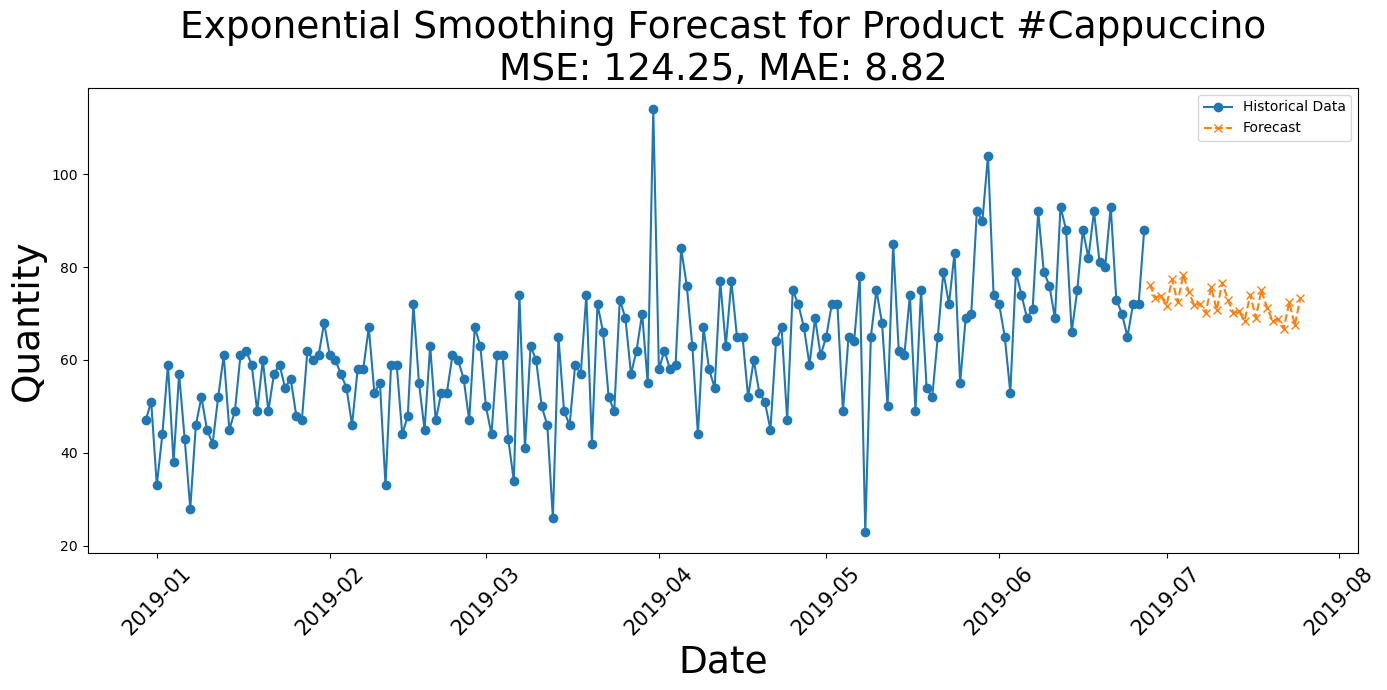

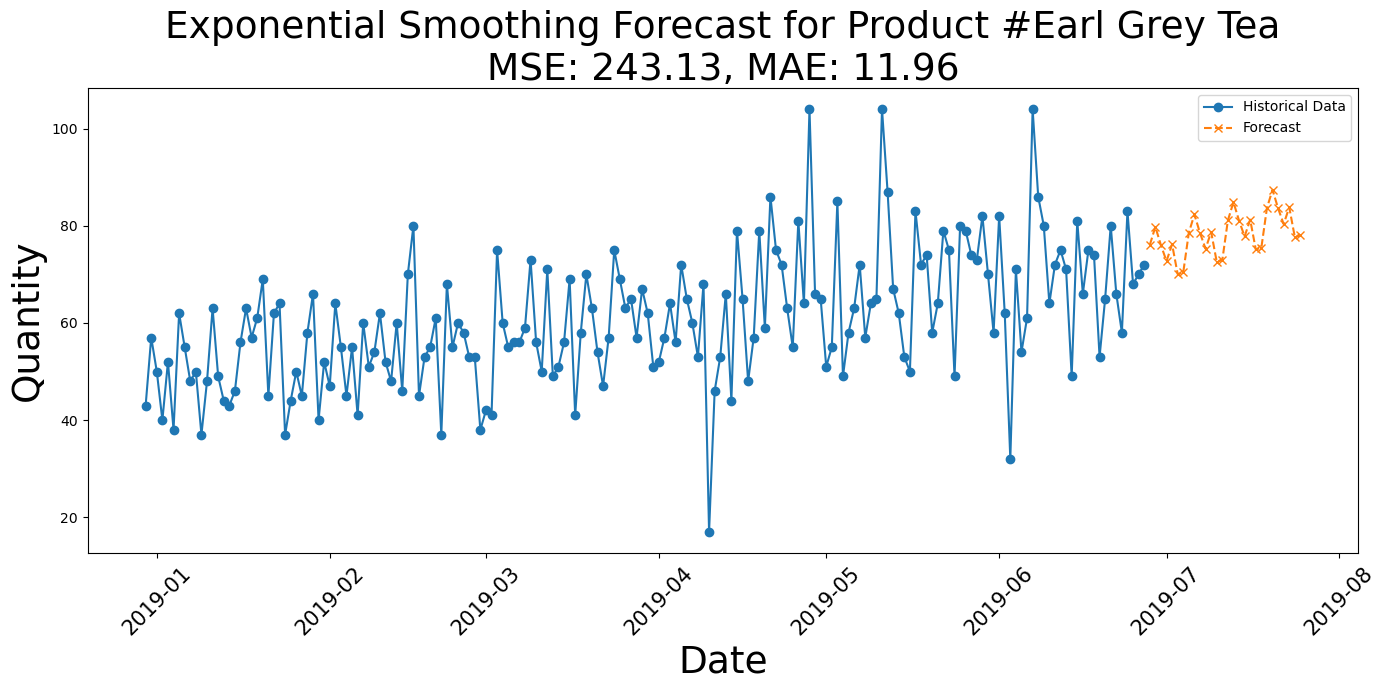

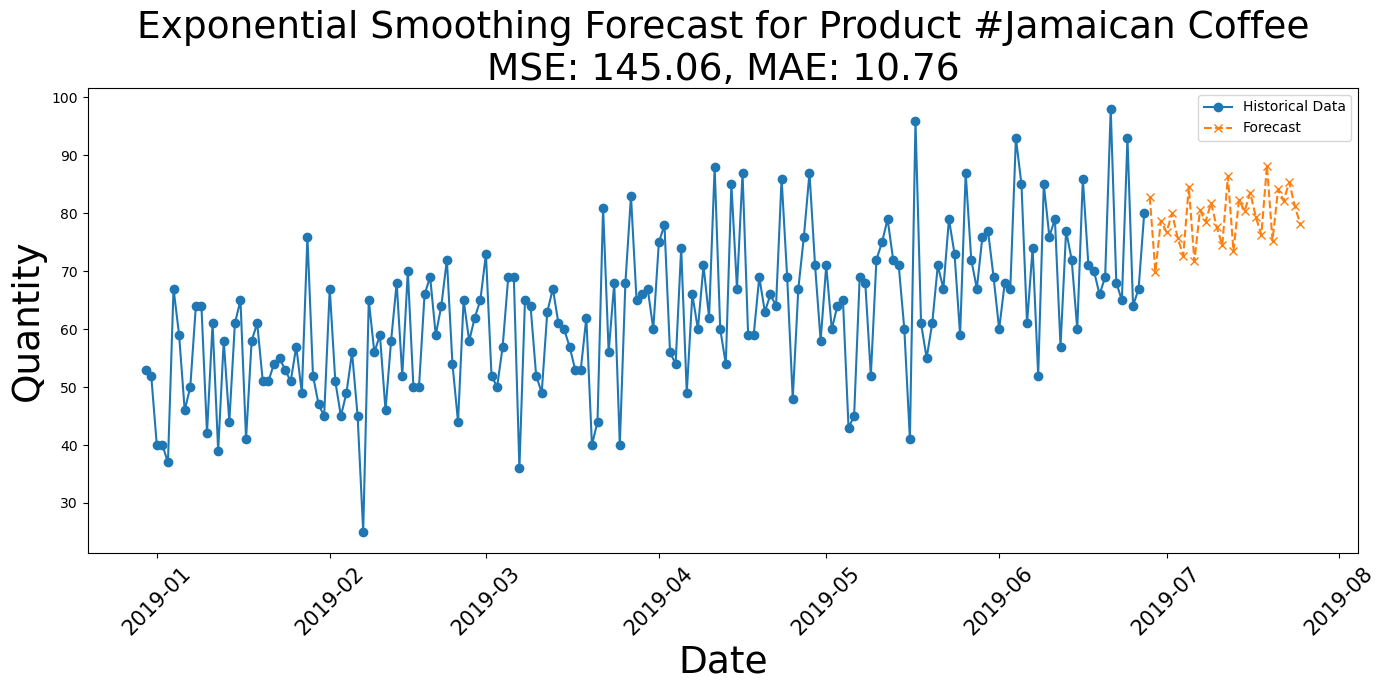

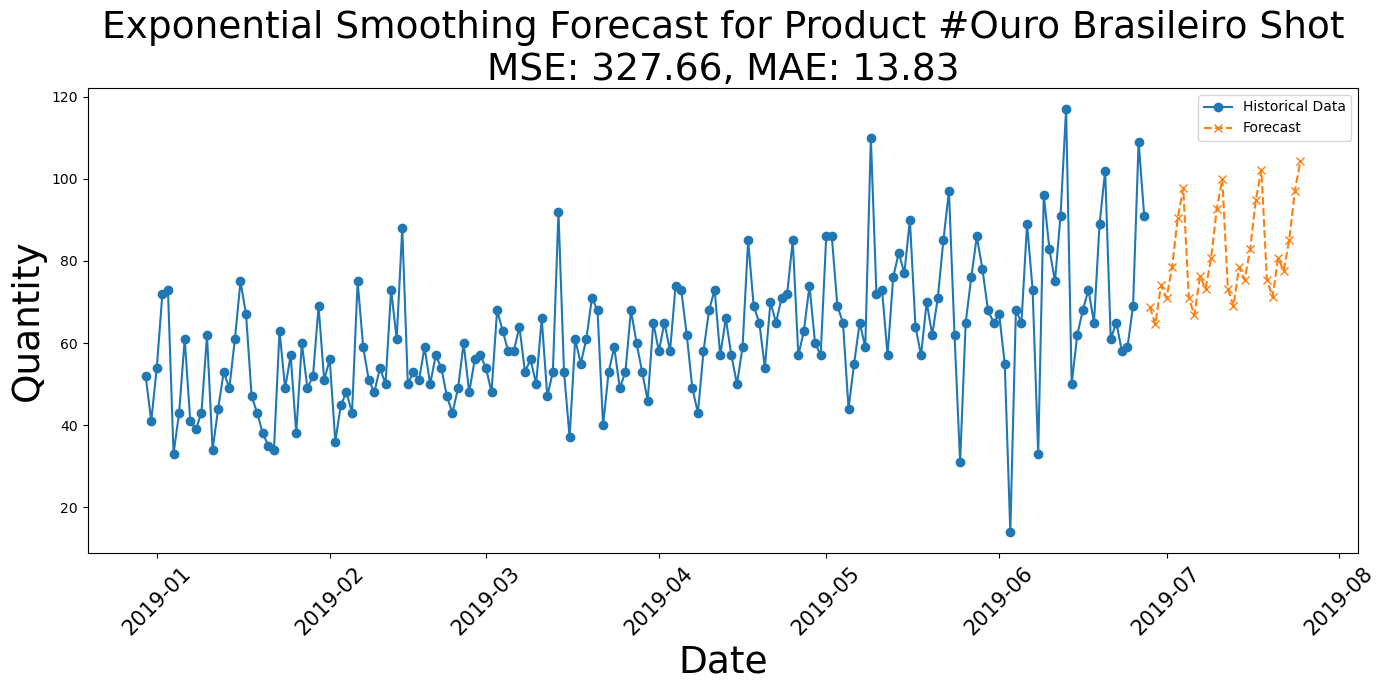

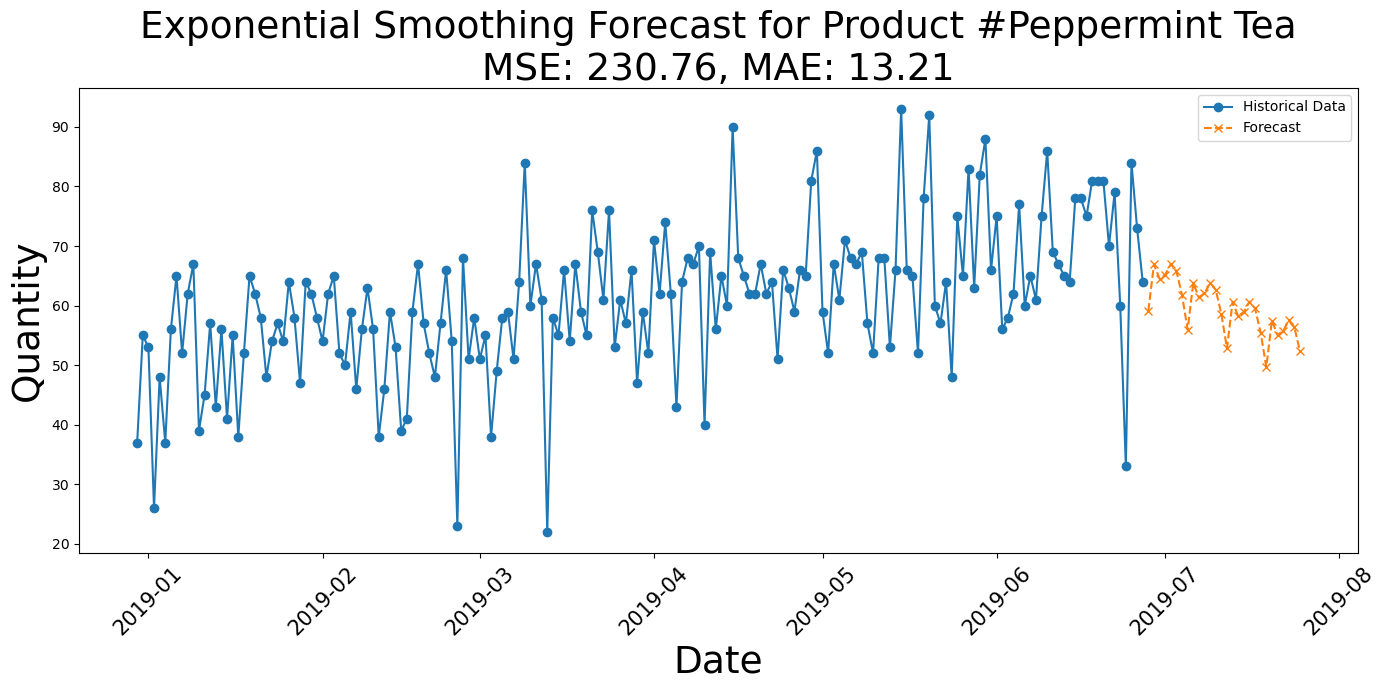

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3575197727.py:61: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


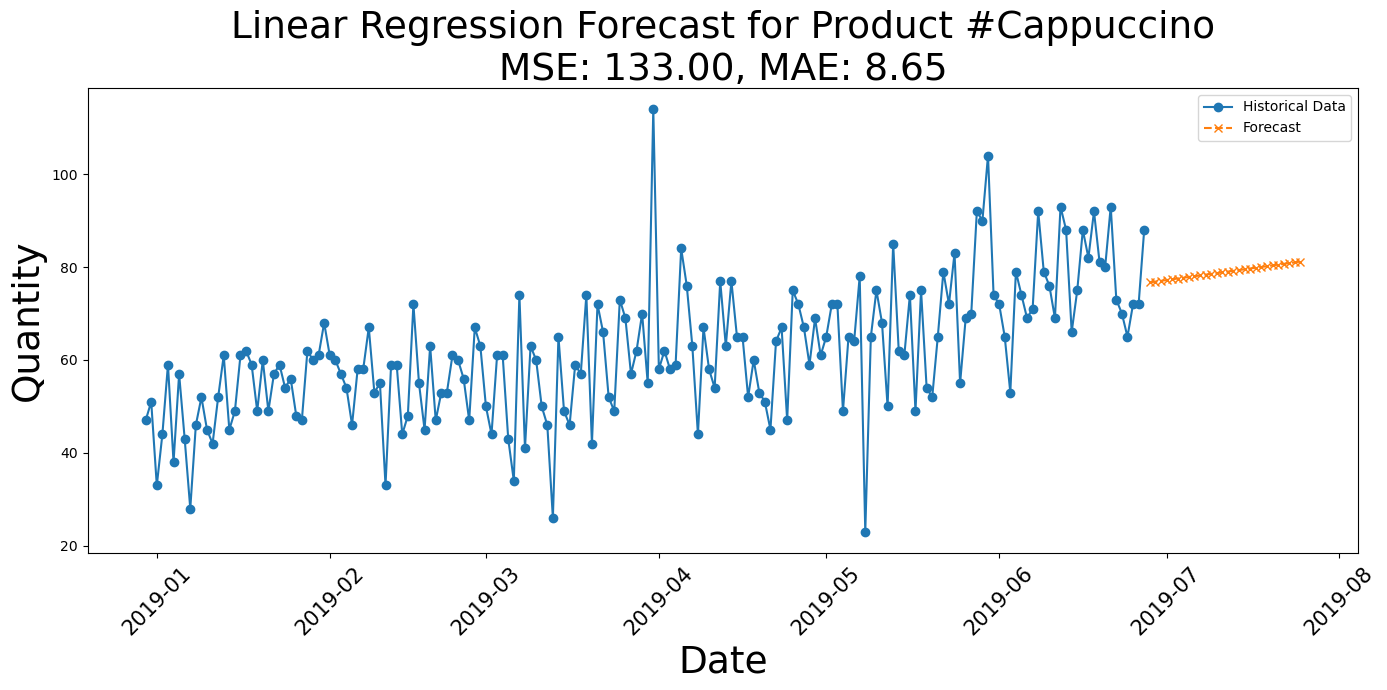

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3575197727.py:61: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


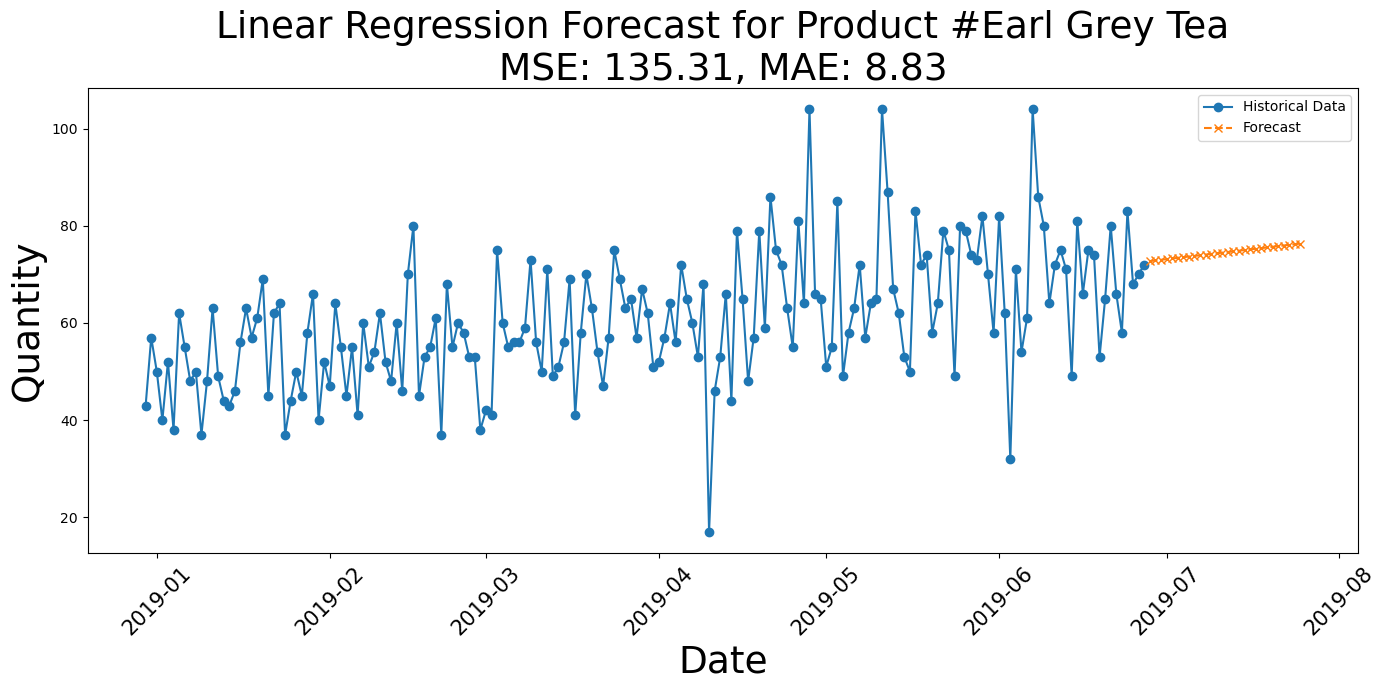

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3575197727.py:61: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


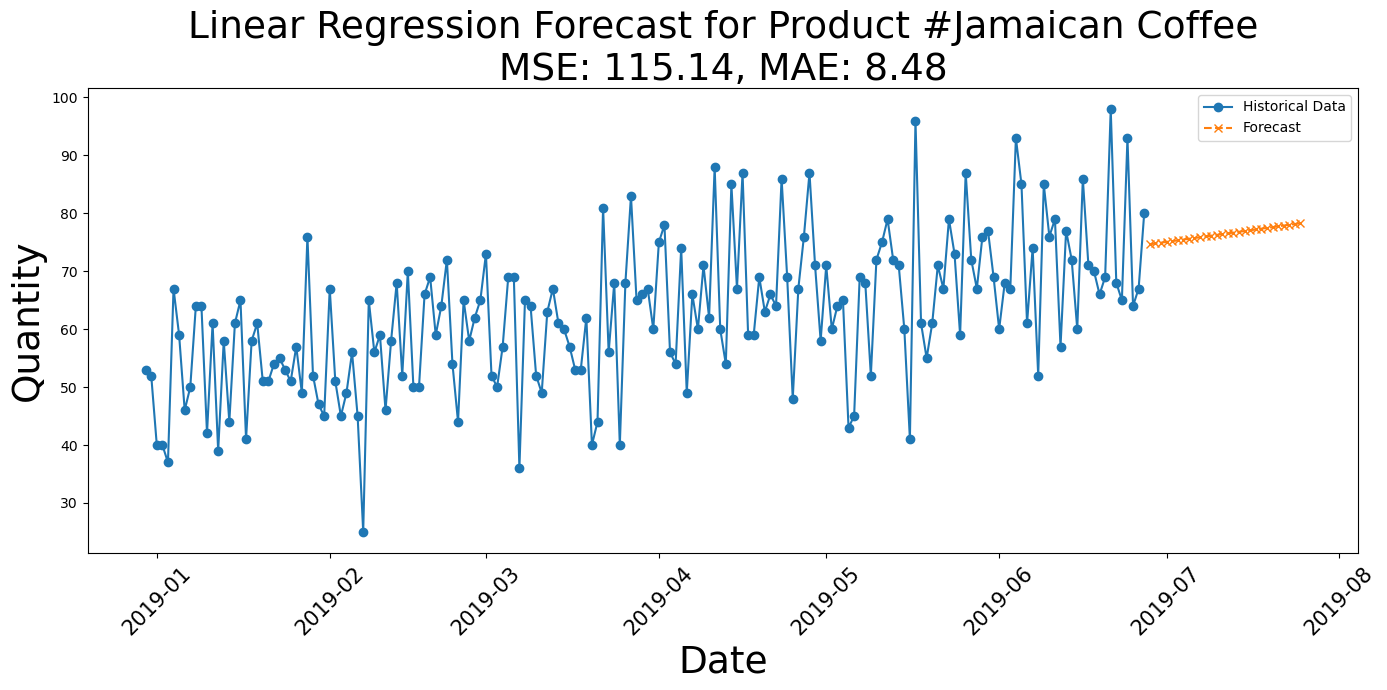

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3575197727.py:61: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


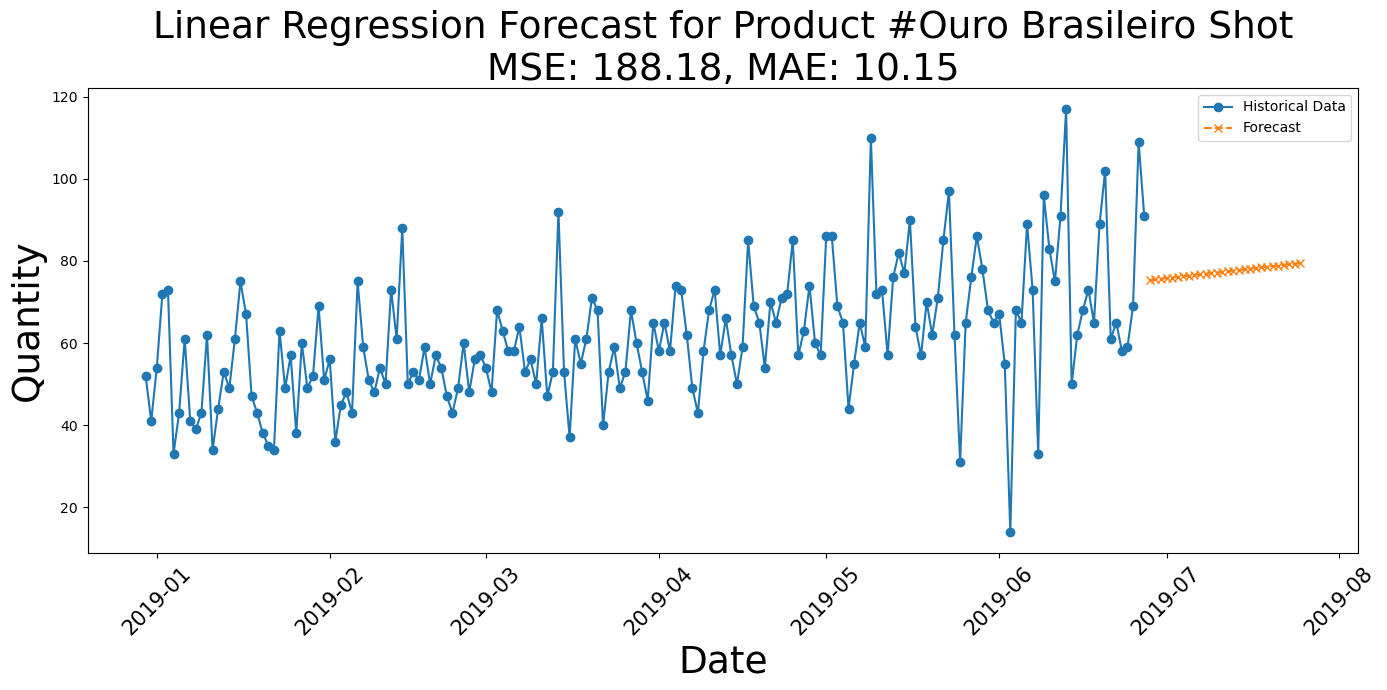

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3575197727.py:61: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


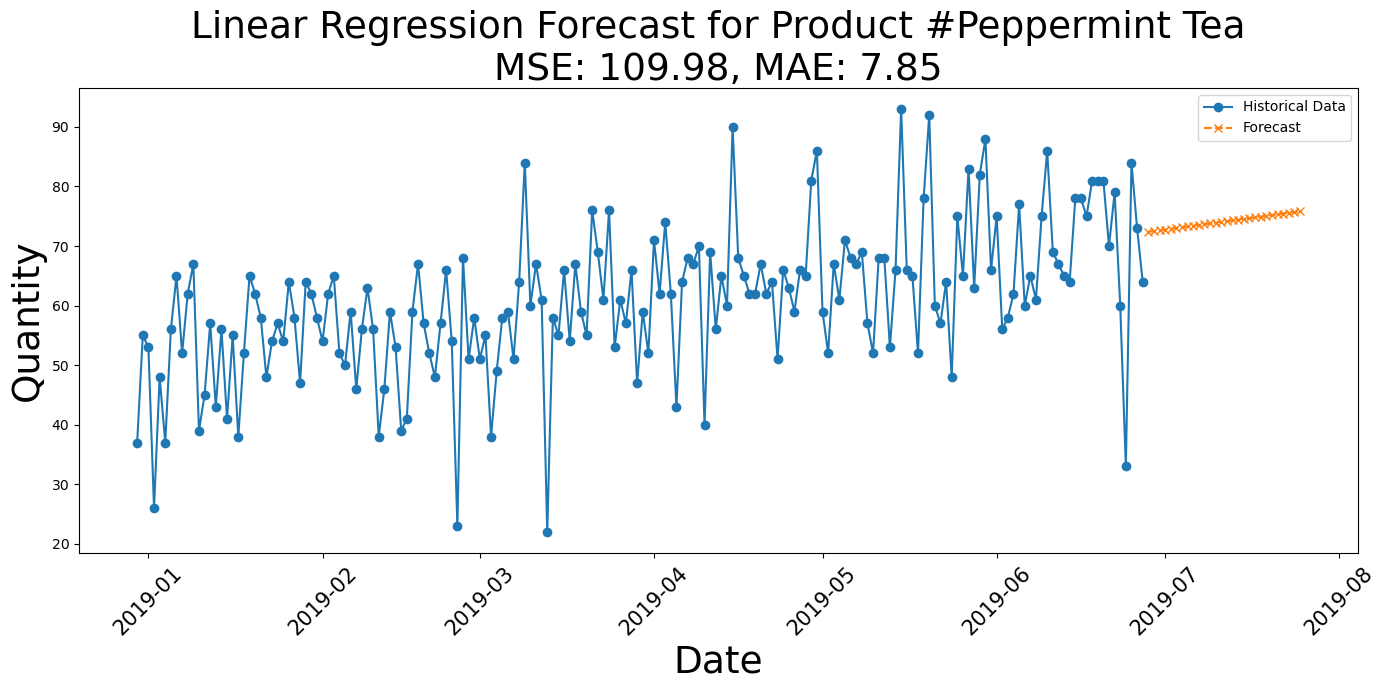

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error



def exponential_smoothing_and_plot(dfs, product_ids, alpha=0.3, beta=0.1, gamma=0.1, forecast_period=28):
    for df, product in zip(dfs, product_ids):
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df = df.sort_values(by='transaction_date').set_index('transaction_date').asfreq('D')

        # Fit the Exponential Smoothing model
        model = ExponentialSmoothing(df['quantity'], trend="add", seasonal="add", seasonal_periods=7)
        fit_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

        # Perform the forecast
        forecast = fit_model.forecast(forecast_period)
        
        # Calculate performance metrics
        mse = mean_squared_error(df['quantity'][-forecast_period:], forecast)
        mad = mean_absolute_error(df['quantity'][-forecast_period:], forecast)


        # Generate dates for the forecast period
        forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_period)

        # Plotting both historical and forecasted data
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['quantity'], label='Historical Data', marker='o')
        plt.plot(forecast_dates, forecast, label='Forecast', marker='x', linestyle='--')
        plt.title(f'Exponential Smoothing Forecast for Product #{product}\nMSE: {mse:.2f}, MAE: {mad:.2f}', fontsize=27)
        plt.xlabel('Date', fontsize=27)
        plt.ylabel('Quantity', fontsize=27)
        plt.xticks(rotation=45, fontsize=15)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{product}_Product_exp_Forecast.png")
        plt.show()
        plt.close()


def linear_regression_and_plot(dfs, product_ids, forecast_period=28):
    for df, product in zip(dfs, product_ids):
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df = df.sort_values(by='transaction_date').set_index('transaction_date').asfreq('D')

        # Prepare the features and target variable
        X = np.arange(len(df)).reshape(-1, 1)
        y = df['quantity'].values
        model = LinearRegression().fit(X, y)

        # Predict for the next 4 weeks
        future_X = np.arange(len(df), len(df) + forecast_period).reshape(-1, 1)
        predictions = model.predict(future_X)

        # Generate dates for the forecast period
        forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')

        # Calculate MAD and MSE
        mse = mean_squared_error(df['quantity'], model.predict(X))
        mad = mean_absolute_error(df['quantity'], model.predict(X))

        # Plotting both historical and forecasted data
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['quantity'], label='Historical Data', marker='o')
        plt.plot(forecast_dates, predictions, label='Forecast', marker='x', linestyle='--')
        plt.title(f'Linear Regression Forecast for Product #{product}\nMSE: {mse:.2f}, MAE: {mad:.2f}', fontsize=27)
        plt.xlabel('Date', fontsize=27)
        plt.ylabel('Quantity', fontsize=27)
        plt.xticks(rotation=45, fontsize=15)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{product}_Product_linreg_Forecast.png")
        plt.show()
        plt.close()
# Replace these placeholders with your actual list of DataFrames and product IDs
dfs = dataframes  # List of your dataframes
product_ids = product_names  # List of product IDs corresponding to each dataframe

# Example usage of functions:
exponential_smoothing_and_plot(dfs, product_ids)
linear_regression_and_plot(dfs, product_ids)


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

def optimize_holt_params(data, initial_level_range, initial_slope_range):
    """
    Find the optimal smoothing_level and smoothing_trend parameters for the Holt's model using cross-validation.
    """
    best_mse = np.inf
    best_params = (None, None)
    
    tscv = TimeSeriesSplit(n_splits=3)  # Number of splits for cross-validation
    
    for train_index, test_index in tscv.split(data):
        train, validation = data.iloc[train_index], data.iloc[test_index]
        
        for smoothing_level in initial_level_range:
            for smoothing_trend in initial_slope_range:
                try:
                    model = Holt(train).fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)
                    forecast = model.forecast(len(validation))
                    mse = mean_squared_error(validation, forecast)
                    
                    if mse < best_mse:
                        best_mse = mse
                        best_params = (smoothing_level, smoothing_trend)
                except Exception as e:
                    continue  # Skip combinations that cause errors
    
    return best_params

params = ""

def holts_method_and_plot(params, dfs, product_ids, forecast_period=28):
    initial_level_range = np.linspace(0.01, 0.99, 10)
    initial_slope_range = np.linspace(0.01, 0.99, 10)
    
    for df, product in zip(dfs, product_ids):
        # Ensure the date column is datetime and set as index
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df = df.sort_values(by='transaction_date').set_index('transaction_date').asfreq('D')
        
        # Optimize model parameters using cross-validation
        best_smoothing_level, best_smoothing_trend = optimize_holt_params(
            df['quantity'], initial_level_range, initial_slope_range
        )
        
        # Fit model with optimized parameters on the entire dataset
        model = Holt(df['quantity']).fit(smoothing_level=best_smoothing_level, smoothing_trend=best_smoothing_trend)
        forecast = model.forecast(forecast_period)
        
        # Calculate MSE and MAE for model evaluation
        mse = mean_squared_error(df['quantity'], model.fittedvalues)
        mae = mean_absolute_error(df['quantity'], model.fittedvalues)
        
        # Generate forecast dates
        forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')
        
        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['quantity'], label='Historical Data', marker='o')
        plt.plot(df.index, model.fittedvalues, label='Holt\'s Smoothing', linestyle='--')
        plt.plot(forecast_dates, forecast, label='Forecast', marker='x', linestyle='--')
        plt.title(f"Holt's Method Forecast for Product #{product} \n MSE: {mse:.2f}, MAE: {mae:.2f}", fontsize=27)
        params += f"Holt's Method Forecast for Product #{product} Optimized Params: Level={best_smoothing_level:.3f}, Trend={best_smoothing_trend:.3f},"
        plt.xlabel('Date', fontsize=27)
        plt.ylabel('Quantity', fontsize=27)
        plt.xticks(rotation=45, fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{product}_Product_holts_Forecast.png")
        plt.show()
        plt.close()


C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3956895155.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


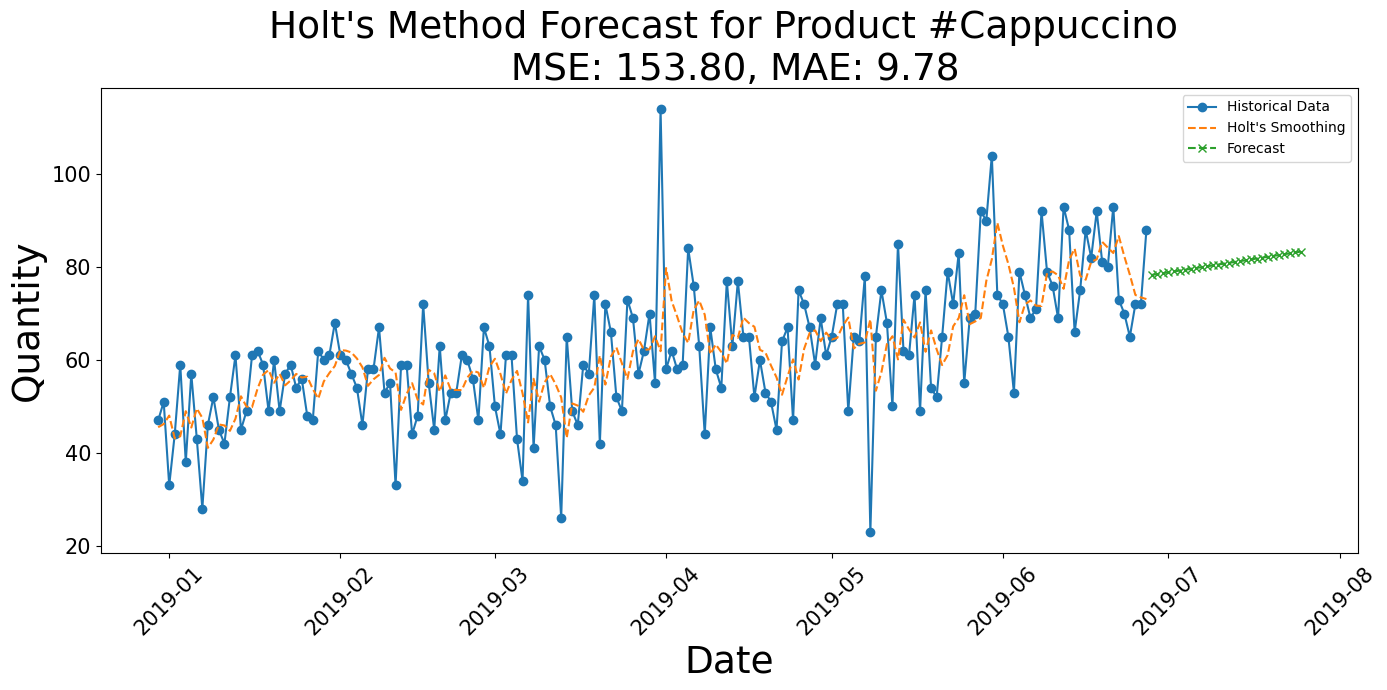

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3956895155.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


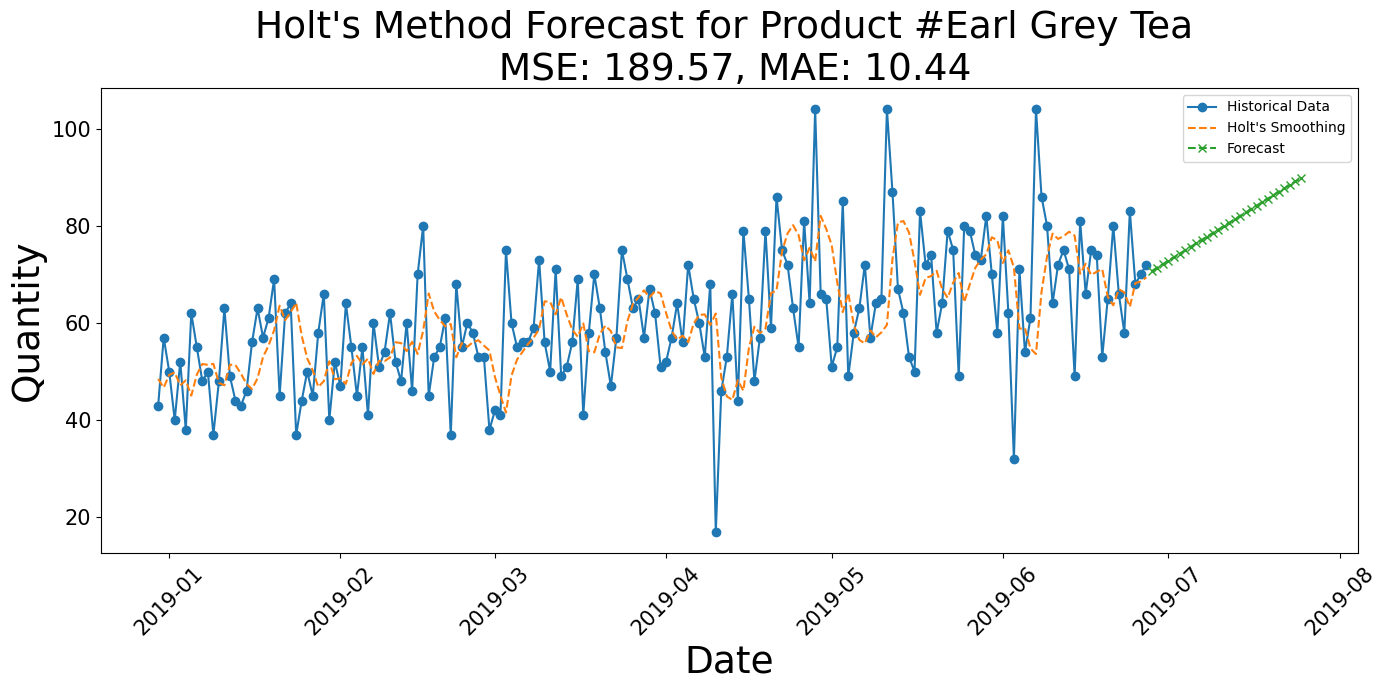

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3956895155.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


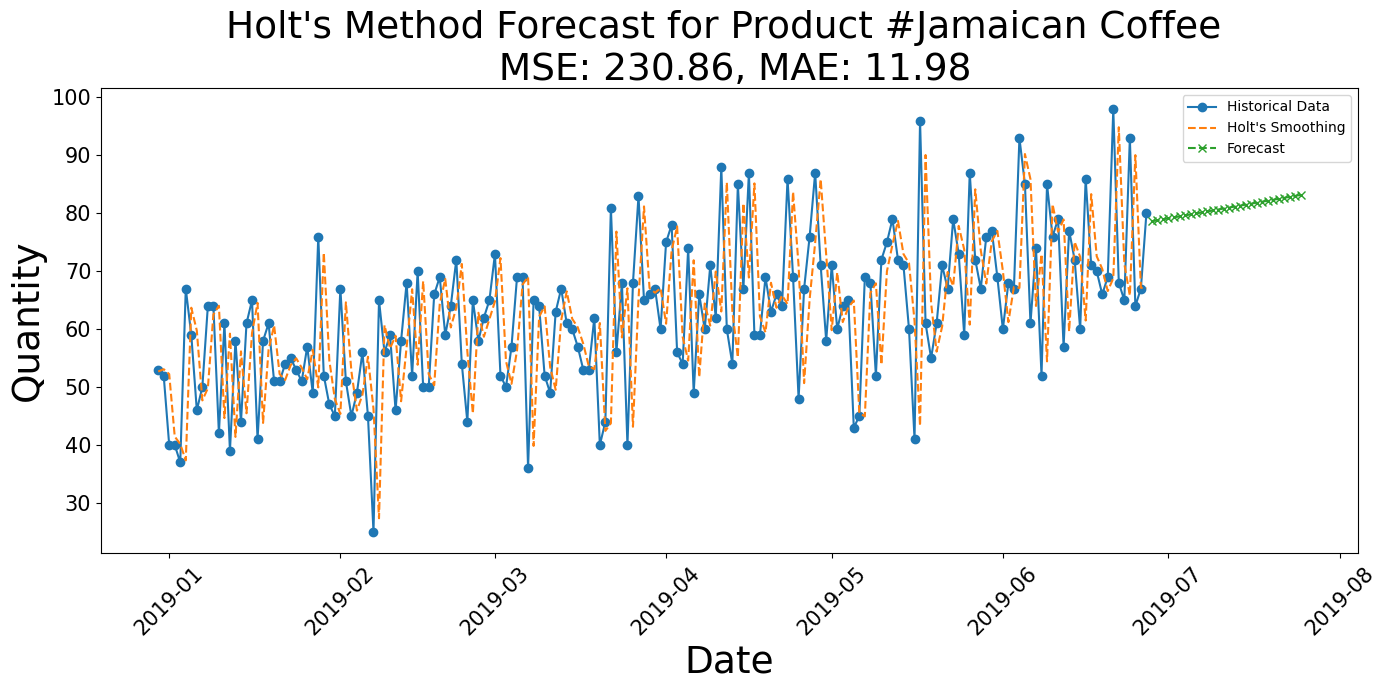

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3956895155.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


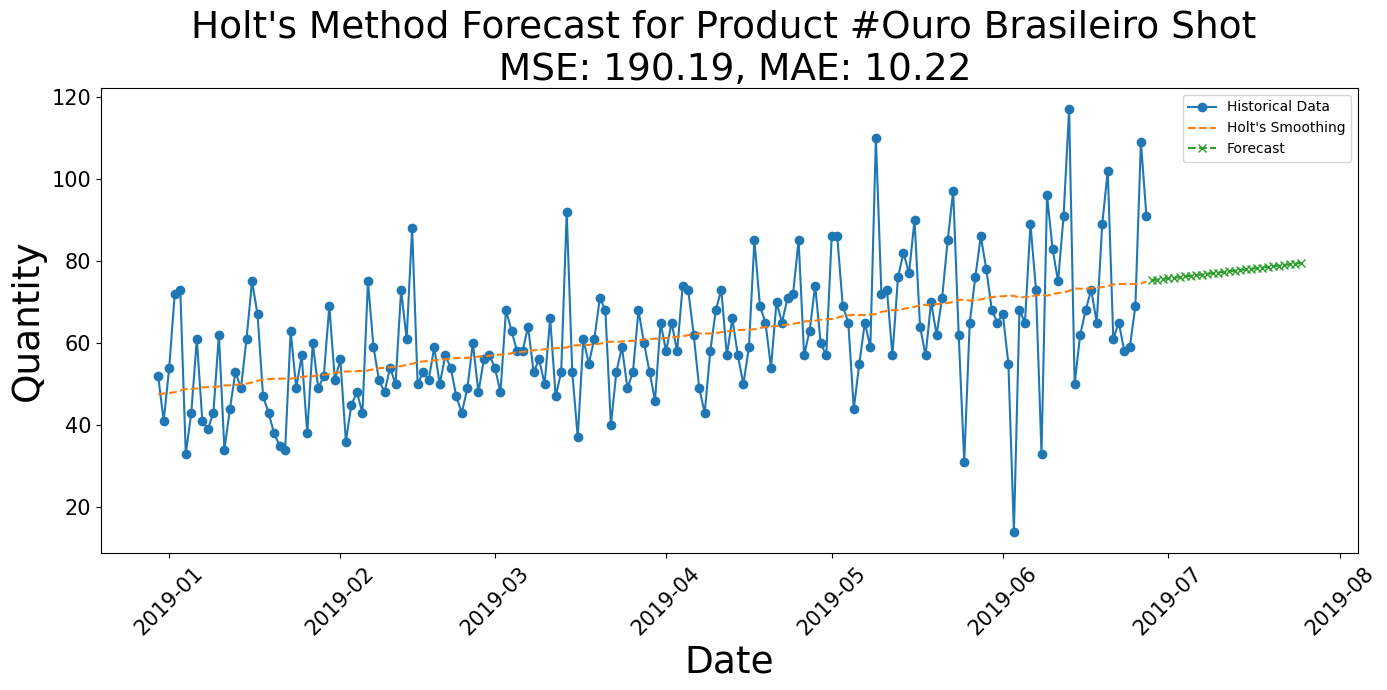

C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3956895155.py:60: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


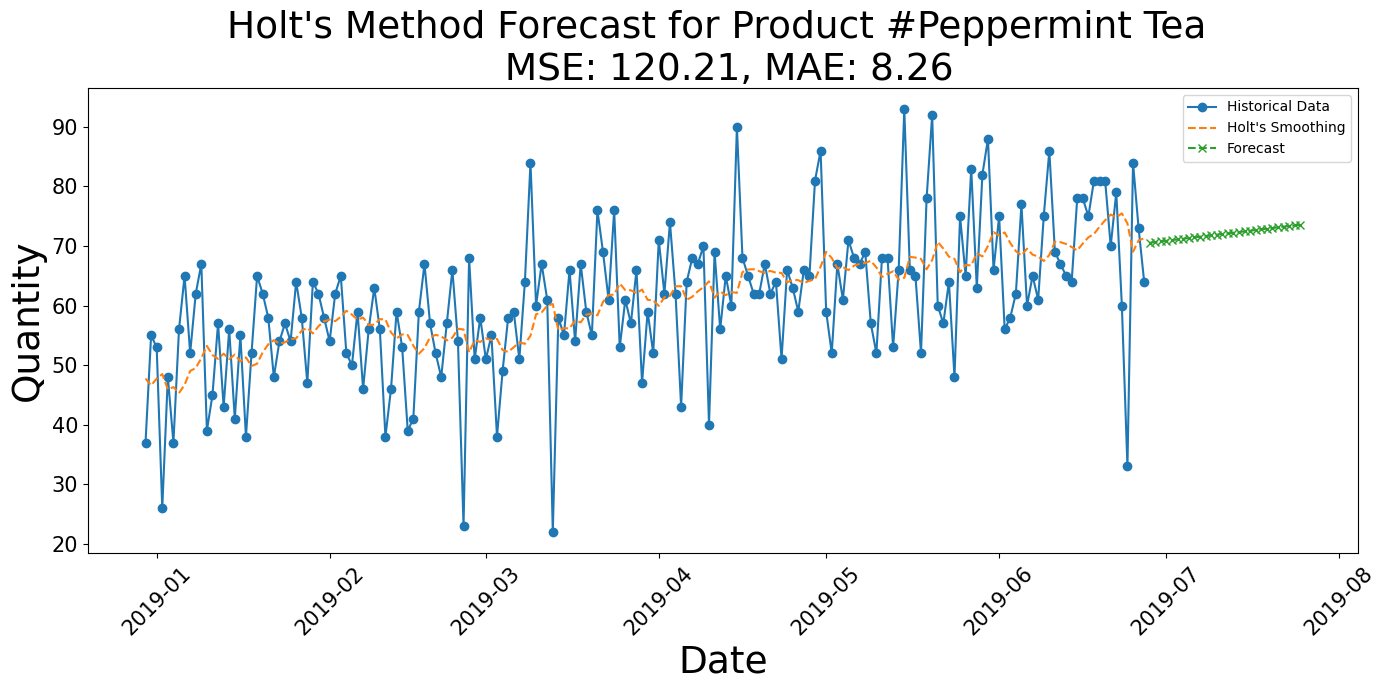

In [62]:
holts_method_and_plot(params, dfs, product_ids)


C:\Users\Agishan\AppData\Local\Temp\ipykernel_7592\3723226830.py:28: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')


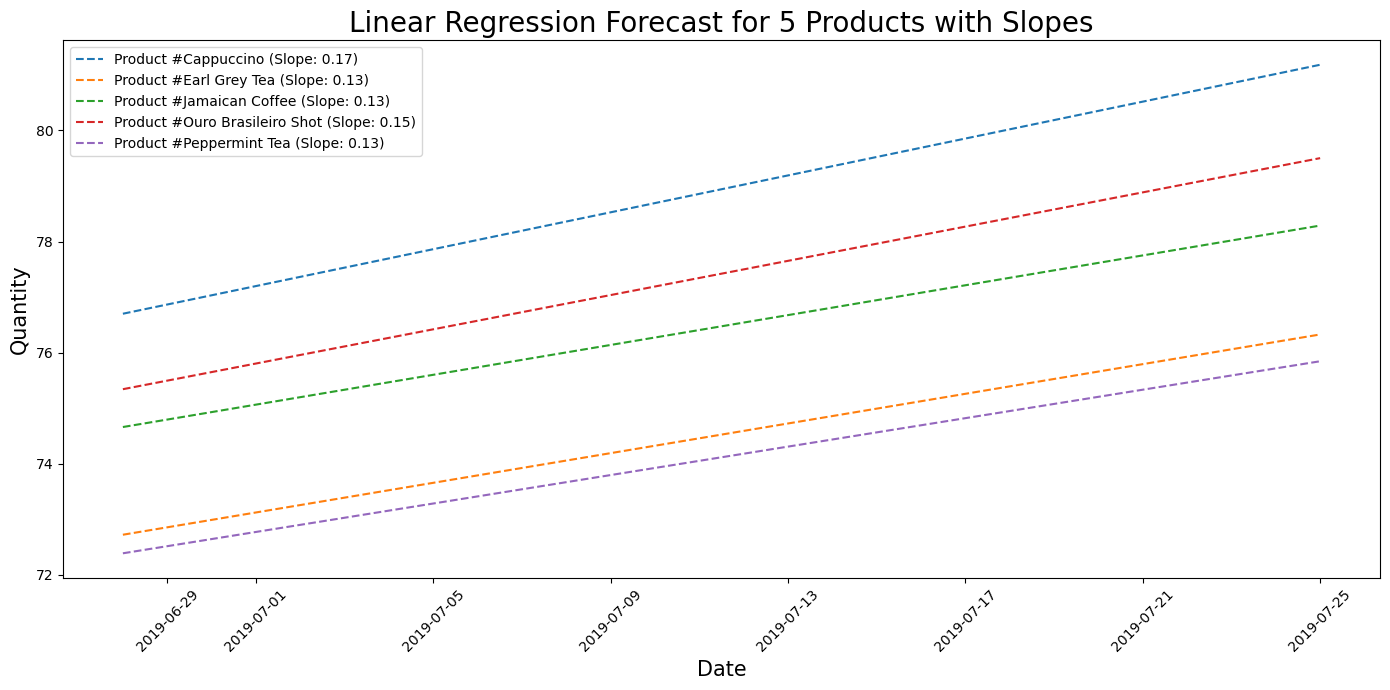

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def linear_regression_and_plot_combined_with_slope(dfs, product_ids, forecast_period=28):
    plt.figure(figsize=(14, 7))
    forecast_dates = None

    for df, product in zip(dfs, product_ids):
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df = df.sort_values(by='transaction_date').set_index('transaction_date').asfreq('D')

        # Prepare the features and target variable
        X = np.arange(len(df)).reshape(-1, 1)
        y = df['quantity'].values
        model = LinearRegression().fit(X, y)

        # The slope of the regression line
        slope = model.coef_[0]

        # Predict for the next 4 weeks
        future_X = np.arange(len(df), len(df) + forecast_period).reshape(-1, 1)
        predictions = model.predict(future_X)

        if forecast_dates is None:
            forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_period+1, closed='right')

        # Plotting forecasted data for each product with the slope in the legend
        plt.plot(forecast_dates, predictions, label=f'Product #{product} (Slope: {slope:.2f})', linestyle='--')

    plt.title('Linear Regression Forecast for 5 Products with Slopes', fontsize=20)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Quantity', fontsize=15)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Replace these placeholders with your actual list of DataFrames and product IDs
dfs = dataframes  # List of your dataframes
product_ids = product_names  # List of product IDs corresponding to each dataframe

# Example usage of the modified function:
linear_regression_and_plot_combined_with_slope(dfs, product_ids)
